In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
import wordcloud
import networkx as nx
import os
import re

# Exercise 1

<b> We begin by preparing the data set (i.e reading data and creating a graph) </b>

In [2]:
G = nx.DiGraph()

In [3]:
marvel = [(x.replace('.txt',''), dict(universe = 'marvel')) for x in os.listdir('./marvel')]
dc = [(x.replace('.txt',''), dict(universe = 'dc')) for x in os.listdir('./dc')]
nodes = marvel + dc

In [4]:
G.add_nodes_from(nodes)

In [5]:
edges = [] #Edges to link characters

In [6]:
#Files containing wiki data
files = ['./marvel/' + x for x in  os.listdir('./marvel')] + ['./dc/' + x for x in os.listdir('./dc')]

In [7]:
#Read files and create edges
for file in files:
    with open(file, 'r', encoding = 'utf8') as f:
        character = re.search(r'\./.+/(.+).txt', file).group(1)
        links = re.findall(r'\[\[(.*?)\]\]', f.read())
        for link in links:
            if link in G.nodes and character in G.nodes:
                edges.append((character, link))
    f.close()

In [8]:
G.add_edges_from(edges)

## Exercise 1.a: Stats

### What is the number of nodes  in the network?

In [9]:
print("The number of nodes in the network is", G.number_of_nodes())

The number of nodes in the network is 3037


This corresponds to the number of characters in the Marvel and DC universe according to the wiki data

### What is the number of links?

The number of links corresponds to the number of links on the wiki pages that these characters have to each other

In [10]:
print("The number of links in the network is", G.number_of_edges())

The number of links in the network is 24013


### What is the number of links connecting Marvel and DC? Explain in your own words what those links mean?

The number of links connecting the two universes says something about how related the characters of the comic book universes are.

In [11]:
edges_by_universe = [(G.node[x[0]]['universe'], G.node[x[1]]['universe']) for x in G.edges]
print("The edges mapped out by universe", edges_by_universe[0:5])

The edges mapped out by universe [('marvel', 'marvel'), ('marvel', 'marvel'), ('marvel', 'marvel'), ('marvel', 'marvel'), ('marvel', 'marvel')]


In [12]:
cross_universe_edges = [x for x in edges_by_universe if x[0] != x[1]]
print("The number of cross-universe edges is {0} corresponding to {1:.0%}"\
      .format(len(cross_universe_edges), len(cross_universe_edges) / len(edges_by_universe)))

The number of cross-universe edges is 1011 corresponding to 4%


Maybe not unexpectedly, there are <b> waaay </b> more links to characters in their own universe...

### Who are top 5 most connected characters? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected.


In [13]:
top_5_in = sorted(list(G.in_degree()), key = lambda x: x[1], reverse=True)[:5]
top_5_out = sorted(list(G.out_degree()), key = lambda x: x[1], reverse=True)[:5]

In [14]:
print("Top 5 by in degree is", [x[0] for x in top_5_in])
print("Top 5 by out degree is", [x[0] for x in top_5_out])

Top 5 by in degree is ['Superman', 'Batman', 'Dorling Kindersley', 'Spider-Man', 'Captain America']
Top 5 by out degree is ['Bigelow, Miss', 'Beast', 'Jackal', 'Brute', 'Barracuda (II)']


<b> In degree </b> <br>
The results are largely as might be expected. The characters with <u> the largest in-degree </u> might be interpreted as the most important or most known, since a lot of other characters mention them on their wiki page <br>

<b> Out degree </b> <br>
The out-degree results are harder to reason about. It might be interpreted as the characters mostly stemming from other stories or most dependent on other characters. Another explanation might be that it is characters that are part of stories with <b> a lot </b> of other characters (e.g Avengers)

### Plot the in and out-degree distributions.

In [13]:
in_degrees = list(dict(G.in_degree()).values())
out_degrees = list(dict(G.out_degree()).values())

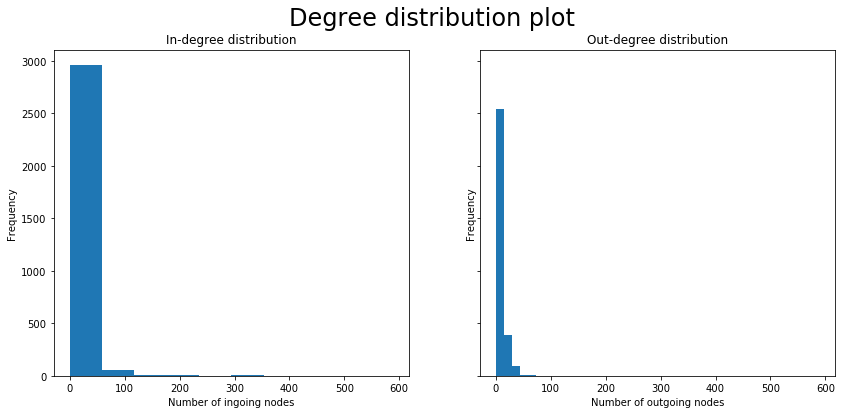

In [14]:
fig, ax = plt.subplots(ncols = 2, figsize = (14,6), sharey = True, sharex = True, )

ax[0].hist(in_degrees)
ax[1].hist(out_degrees)

ax[0].set_title('In-degree distribution')
ax[1].set_title('Out-degree distribution')

ax[0].set_xlabel('Number of ingoing nodes')
ax[0].set_ylabel('Frequency')

ax[1].set_xlabel('Number of outgoing nodes')
ax[1].set_ylabel('Frequency')

fig.suptitle('Degree distribution plot', fontsize = 24)

plt.show()

<b> A few important observations </b>
* The distribution of ingoing nodes is wider that for ingoing
* There are more nodes with <i> very </i> few ingoing edges than very few outgoing

The nature of the in- and out-degree distributions is evident from the above plot. In-degrees stem from characters being <i> popular </i> or <i> important </i>, whereas out-degrees are more related to the inter-relatedness to other characters in the universe. Therefore, it is of no surprise that the distributions are not similar

### Compare the degree distribution to a random network with the same number of nodes and probability of connection $p$. Comment or your results.

We first create a new random network with probability $p$ <br>
We know that $<k> = p(N-1) \Rightarrow p = \frac{<k>}{(N-1)}$

In [18]:
k_avg = sum(list(dict(G.degree).values())) / G.number_of_nodes()
N = G.number_of_nodes()
p = k_avg / (N-1)

In [19]:
print("The connection proability is {:.2%}".format(p))

The connection proability is 0.52%


In [20]:
G_rand = nx.erdos_renyi_graph(n = N, p = p, directed = True)

We know find the degrees for each network

In [21]:
degree_comics = list(dict(G.degree).values())
degree_random = list(dict(G_rand.degree).values())

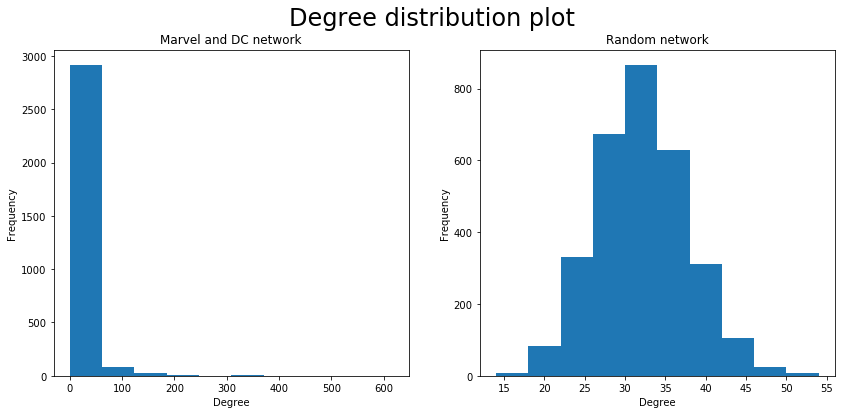

In [22]:
fig, ax = plt.subplots(ncols = 2, figsize = (14,6))

ax[0].hist(degree_comics)
ax[1].hist(degree_random)

ax[0].set_title('Marvel and DC network')
ax[1].set_title('Random network')

ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Frequency')

ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Frequency')

fig.suptitle('Degree distribution plot', fontsize = 24)

plt.show()

We observe that
* The degree distribution for the real-world network of marvel and DC has a much wider distribution
* The distribution for the random network is almost normally distribution around ~30
* There are a few <b> very </b> connected nodes in the real-world network which are not present in the random network

In [23]:
k_avg_rand = sum(list(dict(G_rand.degree).values())) / G_rand.number_of_nodes()

In [24]:
print("Average degree marvel-dc: {0:.2f} | Average degree random: {1:.2f}".format(k_avg, k_avg_rand))

Average degree marvel-dc: 15.81 | Average degree random: 31.58


We note that the average degree is around twice as high as in the case of marvel-dc.

## Exercise 1b: Visualization

### Create a nice visualization of the total network.

We utilize the force atlas algorithm to create a nice visualisation of the graph

In [15]:
import fa2

In [16]:
FA = fa2.ForceAtlas2()

In [17]:
pos = FA.forceatlas2_networkx_layout(G, pos = None, iterations = 1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:31<00:00, 10.88it/s]

BarnesHut Approximation  took  15.28  seconds
Repulsion forces  took  72.67  seconds
Gravitational forces  took  0.36  seconds
Attraction forces  took  0.22  seconds
AdjustSpeedAndApplyForces step  took  1.73  seconds


In [18]:
degrees = np.array(list(dict(G.degree).values()))
node_size = [10 + (np.argwhere(np.argsort(degrees) == i)[0][0]/len(degrees))*20 for i,x in enumerate(degrees)]
node_color = list(nx.get_node_attributes(G, 'universe').values())
node_color = ['green' if x == 'marvel' else 'red' for x in node_color]

In [19]:
edge_universe = [(G.node[x[0]]['universe'], G.node[x[1]]['universe']) for x in G.edges]
edge_color = ['blue' if x[0] == x[1] else 'red' for x in edge_universe]

In [20]:
options = {
    'node_size': node_size,
    'node_color': node_color,
    'edge_color': edge_color,
    'alpha': .8,
    'width': .2
}

C:\Users\bilto\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\bilto\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:569: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\bilto\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


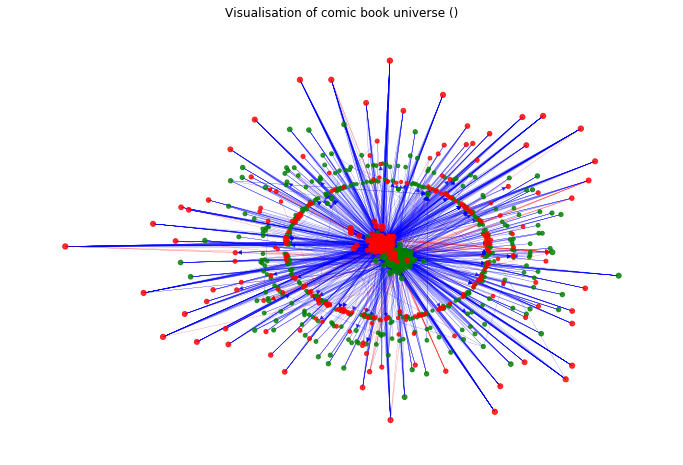

In [21]:
fig, ax = plt.subplots(figsize = (12,8))

nx.draw(G, ax = ax, pos = pos, **options)

plt.title('Visualisation of comic book universe ()')

plt.show()

Above we see a visualisation of the comic book network, where:
* Red nodes corresponds to DC characters
* Green nodes are marvel characters
* There is a blue edge between two characters iff they are from the same universe
* There is a red edge between two characters iff they are from different universes
* Node size varies with the degree

# Exercise 2: TF-TR Wordclouds

We begin by loading both universes in as <i> looong </i> strings and apply a series of preprocessing steps before attempting to create the word clouds.

In [57]:
dc_files = os.listdir('./dc')
marvel_files = os.listdir('./marvel')

In [58]:
#Read in dc files
dc = ''

for file in dc_files:
    with open('./dc/' + file, 'r', encoding = 'utf8') as f:
        dc += f.read()

In [59]:
#Read in marvel files
marvel = ''

for file in marvel_files:
    with open('./marvel/' + file, 'r', encoding = 'utf8') as f:
        marvel += f.read()

<b> Tokenization </b> <br>
We now apply tokenization to the strings. Tokenization is basically breaking the strings into the components of words and punctuation. We utilize the NLTK library for the tokenization step <br>

<i> Note: We also convert the strings to lower case and remove the punctuation since it is not interesting w.r.t creating wordclouds </i>

In [61]:
#Tokenize, set to lower and remove punctuation
dc = [word.lower() for word in nltk.word_tokenize(dc) if word.isalpha()]
marvel = [word.lower() for word in nltk.word_tokenize(marvel) if word.isalpha()]

<b> Lemmatization </b> <br>
Lemmatization is an extended process to stemming. In stemming we such remove affixes (e.g set "laptops" = "laptop"). In lemmatization, however, we also ensure that e.g "woman" = "women". It is, as such, an improved version of stemming.

In [5]:
wnl = nltk.WordNetLemmatizer()

In [63]:
dc = [wnl.lemmatize(t) for t in dc]
marvel = [wnl.lemmatize(t) for t in marvel]

<b> Stop words </b> <br>
The last preprocessing step is to remove stop words. When creating wordclouds and analyzing text in general, we are most often not interested in words such as <i> and, are ... </i>.

In [2]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [70]:
dc = [t for t in dc if t not in stop_words]
marvel = [t for t in marvel if t not in stop_words]

<b> Counting the frequencies (The TF list) </b> <br>
We are now ready to count the frequencies of the words present in the wiki pages of the two universes

In [71]:
dc_word_count = nltk.FreqDist(dc).most_common()
marvel_word_count = nltk.FreqDist(marvel).most_common()

In [76]:
print("Most common words in the dc wiki pages", marvel_word_count[0:5])

Most common words in the dc wiki pages [('comic', 59572), ('ref', 49605), ('marvel', 43914), ('wa', 29142), ('character', 17474)]


We now have the <b> <i> Term Frequency (TF) list </i> </b>. However, we still do not really know <i> what's important </i>. The word "character" (as seen above) for instance, is probably not very interesting. Therefore, we want to <i> weigh </i> the words so that we find out what's <b> unique </b> to the particular universe

<b> Weighing the words </b> <br>
For each universe, we define the weight of some token $t$ as:
$$ w_t^{(m)} = \frac{TF_t^{(m)}}{TF_t^{(d)}+c}$$, for marvel
$$ w_t^{(d)} = \frac{TF_t^{(d)}}{TF_t^{(m)}+c}$$, for dc

Intuitively, the weights are applied to the word (or token) such that if a word has a high frequency in its own universe but a low one in the other universe, the weight is high. On the contrary, regular words are probably common in both universes, making the weight smaller. <br>

<i> Note: The term $c$ is used for not dividing by $0$. We chose to set it to 1, but other values can be used as well </i>

In [1]:
from collections import defaultdict

In [107]:
dc_count_dict = defaultdict(lambda: 0, {x[0]: x[1] for x in dc_word_count})
marvel_count_dict = defaultdict(lambda: 0, {x[0]: x[1] for x in marvel_word_count})

In [121]:
#Loop word count and create weights
dc_weights = {}
marvel_weights = {}

for w, count in dc_word_count:
    dc_weights[w] = count / (marvel_count_dict[w] + 1)

for w, count in marvel_word_count:
    marvel_weights[w] = count / (dc_count_dict[w] + 1)

<b> The TF-TR lists </b> <br>
We now create the TF-TR lists which is the list of tokens for each universe calculated as $TF_t^{(u)} \times w_t^{(u)}$

In [122]:
dc_tf_tr = [(x[0], x[1]*dc_weights[x[0]]) for i, x in enumerate(dc_word_count)]
marvel_tf_tr = [(x[0], x[1]*marvel_weights[x[0]]) for i, x in enumerate(marvel_word_count)]

In [125]:
print("Top words for the dc universe", sorted(dc_tf_tr, key = lambda x: x[1], reverse = True)[:3])

Top words for the dc universe [('bizarro', 8278380.5), ('sinestro', 7806436.0), ('batman', 5059302.260869565)]


We now have the lists from which we can create word clouds

<b> Creating the word cloud </b> <br>

For creating the wordcloud, we repeat the strings according to its (integer) weight. However, to avoid having excessively long strings, we divide each weight with a factor.

In [154]:
dc_tf_tr[0:10]

[('comic', 46319.656555822265),
 ('ref', 25791.665544490585),
 ('wa', 33179.87907902412),
 ('dc', 1714186.5025641026),
 ('batman', 5059302.260869565),
 ('character', 16803.576309012875),
 ('series', 27081.10225937051),
 ('superman', 2948403.3582089553),
 ('cite', 14491.131229673903),
 ('new', 12156.23157078884)]

In [171]:
wordcloud_dc = ''.join('{0} '.format(word) * int(weight / 1e4) for word, weight in dc_tf_tr)
wordcloud_marvel = ''.join('{0} '.format(word) * int(weight / 1e4) for word, weight in marvel_tf_tr)

In [179]:
print("Input for the wordcloud: \"", wordcloud_dc[:18], "\".....")

Input for the wordcloud: " comic comic comic  ".....


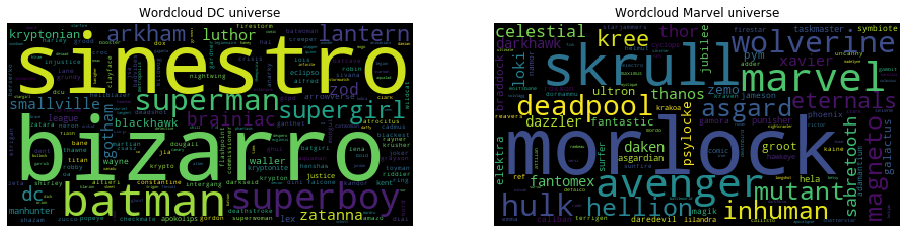

In [196]:
fig, ax = plt.subplots(ncols = 2, figsize=(16,16))

wcloud_dc = wordcloud.WordCloud(collocations=False).generate(wordcloud_dc)
wcloud_marvel = wordcloud.WordCloud(collocations=False).generate(wordcloud_marvel)

ax[0].imshow(wcloud_dc)
ax[1].imshow(wcloud_marvel)

ax[0].set_title('Wordcloud DC universe')
ax[1].set_title('Wordcloud Marvel universe')

ax[0].axis('off')
ax[1].axis('off')
plt.show()

The above plot shows the wordclouds for the two universes. The most important words make intuitive sense. <i> Batman </i> is obviously very important to the DC universe and <i> deadpool, avenger </i> is obviously very important to the marvel universe.

# Exercise 3

This part of the asignment will only look at the DC universe

First initialize the graph from only the DC files and clean up the text a bit. Due to the long processing time of the choosen algorithm for community detection we converted the graph to an undirected. More on that later


In [6]:
import community
relative_path="character wiki pages/dc"
# Reusing code from creation of the digraph replaced, but now with Graph instead of Graph
G = nx.Graph()
nodes_conn=[]
for x in os.listdir(relative_path):
    node_name = x.split(".txt")[0]
    with open(relative_path+"/"+node_name+".txt") as file:
        y=file.read()
    # Get connections
    nodes_conn.append((node_name, re.findall('\[\[\w* *\w* *\w* *\w*\]\]',y)))
    #cleanup of text
    y= y.replace('<\ref>',' ')
    y= y.replace('\n', '')
    y= y.replace("External links", " ")
    y= re.sub('[\\~#%&*{}/:<>?|\[\]\)\("=]'," ",y)
    y= re.sub(' {2,}'," ",y)
    y= [word.lower() for word in nltk.word_tokenize(y) if word.isalpha()]
    y= [wnl.lemmatize(t) for t in y]
    y= [t for t in y if t not in stop_words]
    G.add_nodes_from([(node_name,{'page':y, 'universe':'dc'})])

graph_nodes=[x for x in G.nodes]
for x in nodes_conn:
    for y in x[1]:
        con_name_=y.replace('[[','').replace(']]','')
        if con_name_ in graph_nodes:
            G.add_edge(x[0],con_name_)

print(f"Graph initialised with {len(G.nodes)} nodes and {len(G.edges)} edges/links")

Graph initialised with 1417 nodes and 12110 edges/links


### 3.1 Finding and investigating communities in the DC universe

Comunity detection is about partitioning the nodes (or edges) into an arbitrary number of groups. There are many approaches to this and in [chapter 9](http://networksciencebook.com/chapter/9#basics) of the network book, we are presented to a couple of them.

A method the book describes in detail is the Girvan-Newman algorithm. This algorithm uses hierarchical clustering that identifies high similarity clusters with a divisive algorithm procedure. The concepts are quite simple and a good starting point for the segmentation. <b> The hypothesis is that the many different stories like Batman, SuperMan, justice league etc. will have connections between eachother </b>.

Choosing the optimal segmentation from this would then be chosen by the segmentation which is optimizing the modularity.

<b> Modularity </b> <br>
Modularity is a measure of how connected a group of nodes are compared to the expectation if the network was wired randomly 

Definition from the book
>Consider a network with N nodes and L links and a partition into nc communities, each community having Nc nodes connected to each other by Lc links, where c=1,...,$n_c$. If $L_c$ is larger than the expected number of links between the $N_c$ nodes given the network’s degree sequence, then the nodes of the subgraph $C_c$ could indeed be part of a true community, as expected based on the Density Hypothesis H2 (Image 9.2). We therefore measure the difference between the network’s real wiring diagram ($A_{ij}$) and the expected number of links between $i$ and $j$ if the network is randomly wired ($p_{ij}$)

Since we are segmentating based on the maximizing the modularity, one could argue we should go for the greedy modularity algorithm instead, but since its implementation for directed graphs in netowrkx has a runtime of $n^4$, we had to go for another approach. 

The algorithm for finding the communities below uses the louvain method, which is a greedy method that runs in $O(n*log(n))$ which is a significant improvement.

This also means that our aproach is dependent on the $H4$ hypotesis: 
>For a given network the partition with maximum modularity corresponds to the optimal community structure.

We will not go into detail of the limits of modularity, but they can be found [here](http://networksciencebook.com/chapter/9#modularity) and since this implementation does not guarentee optimality, re-running the algorithm will yield different results. 

OBS:
Many of the community algorithms are only implemented for the nx.Graph class and not nx.DiGraph. <b> This is why we are working with an undirected version </b>

Related note:
Using the betweenness centrality measure and Girvan-Newman algorithm will require around 15 hour of processing time for the whole dc network

In [8]:
from community import community_louvain
from collections import Counter
louvain_partition = community.best_partition(G, weight='weight')
modularity = community.modularity(louvain_partition, G, weight='weight')
comm_values = Counter(louvain_partition.values())
community_segmentatio=[]
for k in comm_values: community_segmentatio.append([x for x in louvain_partition if louvain_partition[x]==k])

In [9]:
top_c=max(community_segmentatio, key=len)
print(f"The found partition have modularity: {modularity} with the largest community including chars {top_c[0]+', '+top_c[1]+', '+top_c[2]}..")

The found partition have modularity: 0.37118159917246324 with the largest community including chars Booster Gold, Sue Dibny, Arak..


### 3.2 Communities in the optimal partition

In [10]:
# Print information on the partitions found
print(f"The algorithm found {len(community_segmentatio)} different communites having modularity: {modularity} \
and largest single community having size: {len(max(community_segmentatio, key=len))} of a total {len(G.nodes)} nodes")

The algorithm found 158 different communites having modularity: 0.37118159917246324 and largest single community having size: 257 of a total 1417 nodes


### 3.3 Distribution of sizes for the best community split

We now have a split in the graph with large modularity. Lets take a closer look at it

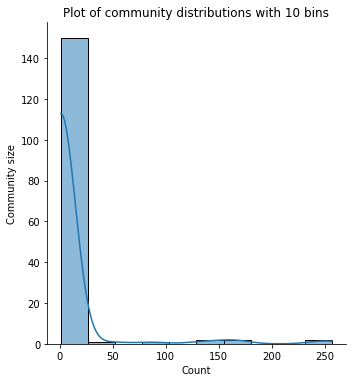

In [15]:
import seaborn as sns
ax= sns.displot([len(x) for x in community_segmentatio],kde=True, bins=10)
plt.xlabel('Count')
plt.ylabel('Community size')
plt.title(r'Plot of community distributions with 10 bins')
plt.show()

We see that there is a large part of the nodes that belong to small communities and that we also have some very large ones. Here we are of course affected by the fact that many nodes are in a vauge community in the sense of a directed graph being converted to an undirected

### 3.4 TF-IDF for large DC-comics communities

The term TF-IDF is short for term frequency–inverse document frequency[\[2\]](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

TF-IDF is a statistical measure for the importance of a word in a document or corpus. The goal of using this statistical measure is to idetify themes or elements of importance within the identified communities. The expected result is for example some words related to violence and crime to be dominant within the villan community surrounding The Joker


#### Calculation of TF-IDF
The calculation of TF-IDF can be done in many ways. Examples of TF are

>Boolean "frequencies": tf(t,d) = 1 if t occurs in d and 0 otherwise;
term frequency adjusted for document length: tf(t,d) = ft,d ÷ (number of words in d)
logarithmically scaled frequency: tf(t,d) = log (1 + ft,d);
augmented frequency, to prevent a bias towards longer documents\[2\]


Because the document length varies quite a lot between the different charaters we were considering going for the term frequency adjusted for document length, but choose to use the bare count.

For the IDF we use $log(1+\frac{N}{1+n_t})$ as it is a common choice with the +1 in the denominator ensuring not division by zero and the other +1 ensuring >1 value for the log fuction.

#### Documents and Collections
As mentioned earlier the TF-IDF measure is a measure for a single document. After discussion with the TA's we decided to model the problem the following way
* The documents $D$ are the joined pages for a given community 
* The Collection $C$ is the joined documents for our identified top communities

In [17]:
from collections import Counter
import math

def generate_document(Gr, nodes:list):
    return [z for y in nodes for z in Gr.nodes[y]['page']]
def generate_tridf(document:list, collection:list):
    # Tr calculation
    # Naive count
    tr=Counter(document)
    # other variations
    #for k in tr: tr[k] = math.log10(tr[k]+1)
    #for k in tr: tr[k] /= len(document)

    
    # IDF
    N=len(documents)
    # Flatten list of lists
    col_flat=[y for x in collection for y in x]
    idf=Counter(col_flat)
    # Used choosen measure
    for k in idf: idf[k] = math.log(1+ N/(idf[k]+1))
    tridf={k:tr[k]*idf[k] for k in tr}
    return tridf


In [18]:
# How many communities do we want to observe
top_n_communities=6
top_comm = sorted(community_segmentatio, key=lambda t: len(t), reverse=True)[:top_n_communities]
# Get the index of these locations in the community levels 

# Get the elements for our top_n_communities
documents = [generate_document(G,x) for x in top_comm]

# No need to calculate the idf table every time, but the runtime is very small anyways 
tridf = [generate_tridf(x,documents) for x in documents]

In [19]:
# Lets take a look at a singe community
import operator
sorted_tridf = sorted(tridf[0].items(), key=operator.itemgetter(1), reverse=True)
for i,x in enumerate(sorted_tridf):
    if i==5:
        break
    print(x)

('flessel', 5.877386805349954)
('creig', 5.726408333416968)
('robby', 5.720190678107459)
('snapper', 5.677976822426527)
('java', 5.604673679191016)


### 3.5 Wordcloud for large communities
We now take a look at the wordclouds for our communities. We will also introduce a limit on how many elements shown in the wordcloud.

Looking at he above data, we decided introducing an exp transformation of data to get a larger spread in data for a better visualisation.

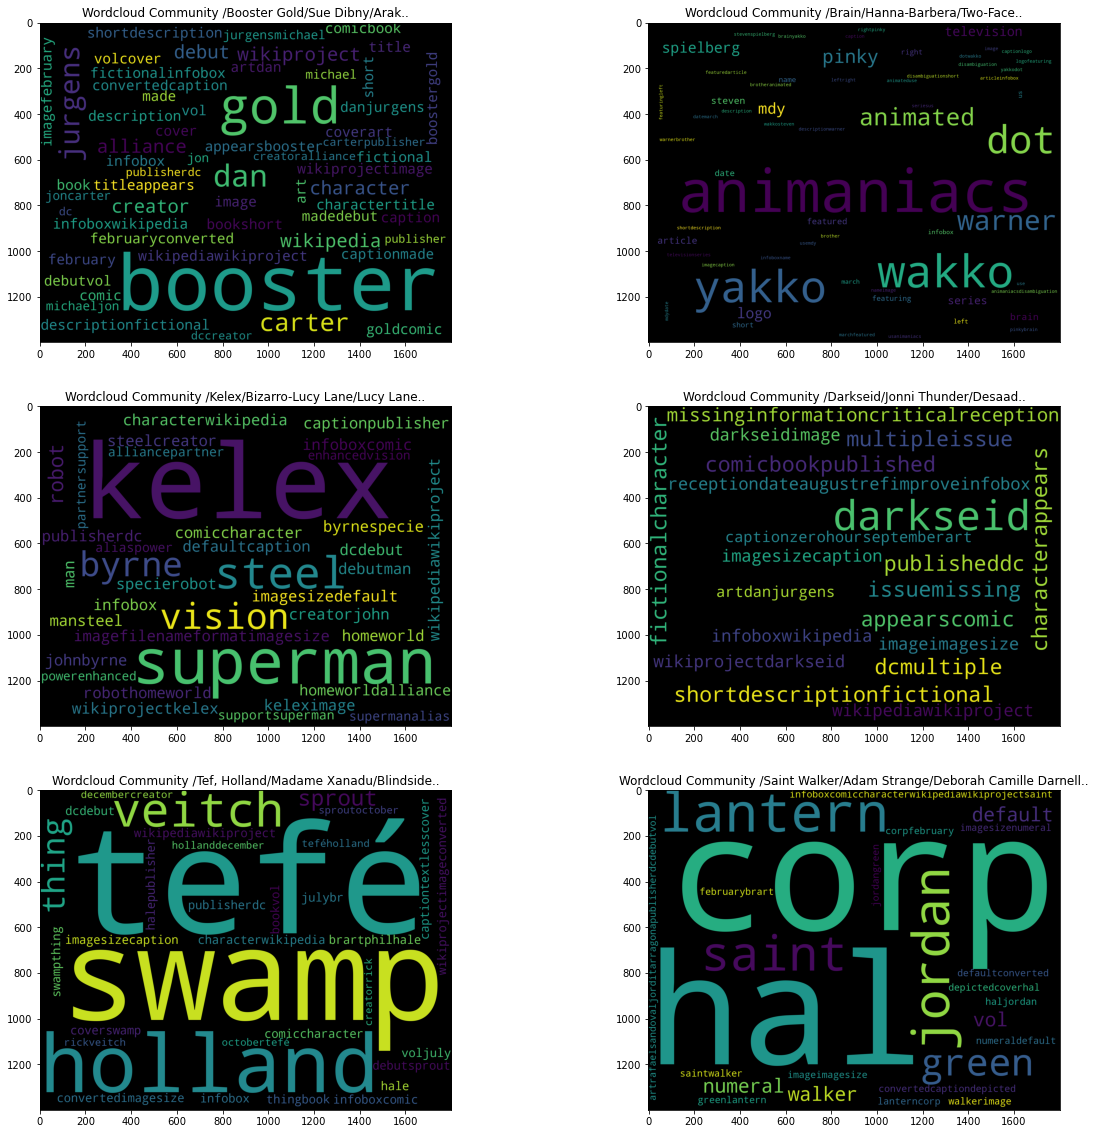

In [20]:
word_clouds_data=[]
reduce_factor=1
limit_words=30
for x in tridf:
    word_string=""
    i=0
    for k, v in x.items():
        if limit_words:
            if limit_words<i:
                break
        word_string=word_string +" ".join([k]*int(math.exp(v)))
        i+=1
    word_clouds_data.append(word_string)

    

# Set manually
nr=3
nc=2
fig, ax = plt.subplots(nrows=nr,ncols = nc, figsize=(20,20))

assert nr*nc>=len(word_clouds_data)
idx=0
for i in range(nr):
    for j in range(nc):
        t_wordcloud = wordcloud.WordCloud(collocations=False,
                                          background_color='black',
                                          width=1800,
                                          height=1400).generate(word_clouds_data[idx])
        ax[i][j].imshow(t_wordcloud)
        
        # Title is just the first 3 nodes in community
        title=""
        for node in top_comm[idx][0:3]: title+="/"+node
        ax[i][j].set_title(f'Wordcloud Community {title}..')
        idx+=1
plt.show()

What we see here is a plot of the most important words defined by or TR-IDF weighting scheme. Some noticable points
* Kelex and Superman are strong elements of the middel left community. Looking at the wiki for Kelex we get: Kelex is a fictional robot appearing in American comic books published by DC Comics, commonly in association with the superhero Superman.
* Middle right plot seems to mostly influenced by "wikipedia" meta data which indicates the cleanup could be more thurow
* In the bottom left community we also get a strong values for Swamp and Holland 
* From below we also see that the communities are probably too big as the top 6 almost contains 95%
* Furthermore it should also be noted that alot of values in the TR-IDF are very close and this difference was increased with the exp transformation

In [25]:
# Community sizes
for x in range(len(top_comm)): print(f"Community {x} has {len(top_comm[x])} members")

community 0 has 257 members
community 1 has 244 members
community 2 has 170 members
community 3 has 163 members
community 4 has 149 members
community 5 has 131 members


# Exercise 4

In this section we perform sentiment analysis on each wikipage and each community. The purporse of sentiment analysis is to investigate, whether characters in the DC universe are associated with happy or sad wikitext, and from this evaluate what characterizes a happy/sad character.

In [33]:
import pandas as pd
from nltk.corpus import stopwords

We begin by reading data of the sentiments

In [34]:
data = pd.read_csv('Data_Set_S1.txt', sep="\t", header=None)
data.columns = ["word", "happiness_rank", "happiness_average", "happiness_standard_deviation", "twitter_rank", "google_rank", "nyt_rank", "lyrics_rank"]
df = data[1:]

In [35]:
path = '/Users/asbjornbering/Downloads/charwik/dc'

In [36]:
dc_files = os.listdir(path) 

### Calculate and store sentiment

Two important decision:

<b> Not using a lemmatizer </b> <br>
We avoid using a lemmatizer because words such as "armed" or "arm" does not have the same meaning nor the same sentiment associated to it. The same argument goes for words that are stemmed to be equal (part of lemmatization: "have" and "had" can have different sentiments.

We also consider whether to remove stop words. The assumption is that these are neutral words, and thus they should be removed. But before concluding this, we plot a histogram of their sentiment score.

In [37]:
stop_words = set(stopwords.words('english'))
stopvals = []
for i in range(len(df['happiness_average'][df['word'].isin(stop_words)].values)):
    stopvals.append(float(df['happiness_average'][df['word'].isin(stop_words)].values[i]))

We choose to investigate the values of the stop words by using a histogram, because this will give an overvies of whether there exists non-neutral stop words, that is, their "happiness average" is smaller than for or larger than 6.

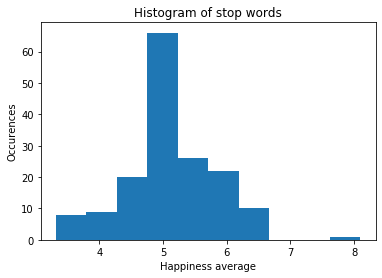

In [38]:
plt.hist(stopvals)
plt.xlabel("Happiness average")
plt.ylabel("Occurences")
plt.title("Histogram of stop words")
plt.show()

We notice there are some stop words that are non-neutral, and thus we won't remove stop words from the texts.
Additionally we set all words in the texts to lower case, because they are in lower case in the sentinent data as well.

A neutral word has a score of 5, and as stated in the article (<b>Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter, 2011, Peter Sheridan Dodds et al.</b>), it makes sense to get rid of all the neutral words, because they don't say anything about the happiness of a text. Thus we remove all words with a happiness average smaller than 6 and larger than 4.
This means we choose $\Delta h_{avg} = 1$, and remove all words that lies $h_{avg}$ within the neutral score of 5, that is, $5-h_{avg}<h_{avg}<5+h_{avg}$.

In [39]:
df['happiness_average'] = pd.to_numeric(df['happiness_average'], downcast="float")

/Users/asbjornbering/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df = df[(df['happiness_average']>6) | (df['happiness_average']<4)]

We calculate the sentinent given by the formula below, for every dc character's wikitext

$$V_{text} = \frac{\sum \limits_k v_k f_k}{\sum \limits_k f_k}$$

In [42]:
char_scores = []

#For each character calculate sentiment and store in list
#Output = [(character, sentiment), ..., (character, sentiment)]
for file in dc_files:
    dc = ''
    words = 0
    happy_score = 0
    with open(path + '/' + file, 'r', encoding = 'utf8') as f:
        dc += f.read()
        dc = [word.lower() for word in nltk.word_tokenize(dc) if word.isalpha()]
        dc = [word for word in dc if word in list(df['word'])]
        
        if len(dc) == 0:
            print("No words with a happiness score found in {} wikitext".format(file[:-4]))   
        
        else:
            dc_word_count = nltk.FreqDist(dc).most_common()
            for i in range(len(dc_word_count)):
                words += dc_word_count[i][1]
                happy_score += df['happiness_average'][df['word'] == dc_word_count[i][0]].values[0]*dc_word_count[i][1]
            
            v_text = happy_score/words
            char_scores.append((file[:-4], v_text))

No words with a happiness score found in Umbaluru wikitext
No words with a happiness score found in Basquat wikitext
No words with a happiness score found in Breathtaker wikitext
No words with a happiness score found in Quislet wikitext
No words with a happiness score found in Jack Wyznowski wikitext
No words with a happiness score found in Mervyn Pumpkinhead wikitext
No words with a happiness score found in Young Frankenstein wikitext
No words with a happiness score found in Burgess, Roderick wikitext
No words with a happiness score found in Davis Bloome wikitext
No words with a happiness score found in Rainbow Archer wikitext
No words with a happiness score found in Bloome, Davis wikitext
No words with a happiness score found in Mnemoth wikitext
No words with a happiness score found in Tess Mercer wikitext


All characters in the DC universe are now stored in a list alongside their sentiment. Below a subset of the list is shown:

In [43]:
char_scores[:5]

[('Garguax', 5.489642830122085),
 ('Booster Gold', 6.009891774076174),
 ('Blackrock', 6.880000114440918),
 ('Sue Dibny', 5.727981914956886),
 ('Pozhar', 6.58222230275472)]

### Histogram

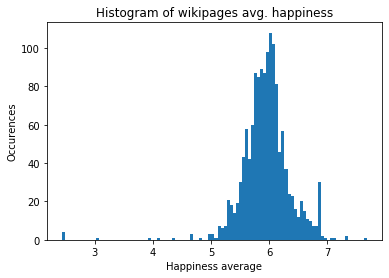

In [44]:
plt.hist([x[1] for x in char_scores], bins=100)
plt.xlabel("Happiness average")
plt.ylabel("Occurences")
plt.title("Histogram of wikipages avg. happiness")
plt.show()

The histogram suggest that the wikitexts of the DC characters follows a normal distribution with regards to sentiment

### "Happiest" characters
Here are the ten "happiest" wiki pages:

In [45]:
sorted(char_scores, key=lambda tup:(-tup[1], tup[0]))[:10]

[('Jack of Spades II', 7.679999828338623),
 ('Jack Holdaway', 7.320000171661377),
 ('Rose Walker', 7.320000171661377),
 ('Galactiac', 7.105000138282776),
 ('Rose Psychic', 7.1000001430511475),
 ('#711', 6.953333377838135),
 ('Cash Tankinson', 6.915000041325887),
 ('Blue Tracer', 6.908888975779216),
 ('Ace of Spades', 6.880000114440918),
 ('Azazel', 6.880000114440918)]

### "Saddest" characters

In [46]:
sorted(char_scores, key=lambda tup:(-tup[1], tup[0]), reverse=True)[:10]

[('Time Trapper', 2.440000057220459),
 ('Lion-Mane', 2.440000057220459),
 ('Carapax', 2.440000057220459),
 ('Byth', 2.440000057220459),
 ('Jack Daw', 3.059999942779541),
 ('Colonel Computron', 3.9200000762939453),
 ('Mindboggler', 4.090000033378601),
 ('J. Wilbur Wolfingham', 4.330000003178914),
 ('Sand Demon', 4.6600000858306885),
 ('Prince Evillo', 4.6600000858306885)]

#### All characters in the above lists have almost no text, so the score is only based on very few (maybe only one) word. We thus choose to create 2 new lists, but this time only considering characters that has descriptions with more than 50 words with a happiness average.

In [62]:
char_scores = []

#For each character calculate sentiment and store in list
#Output = [(character, sentiment), ..., (character, sentiment)]
for file in dc_files:
    dc = ''
    words = 0
    happy_score = 0
    with open(path + '/' + file, 'r', encoding = 'utf8') as f:
        dc += f.read()
        dc = [word.lower() for word in nltk.word_tokenize(dc) if word.isalpha()]
        dc = [word for word in dc if word in list(df['word'])]
        
        if len(dc) < 50:
            pass;
        
        else:
            dc_word_count = nltk.FreqDist(dc).most_common()
            for i in range(len(dc_word_count)):
                words += dc_word_count[i][1]
                happy_score += df['happiness_average'][df['word'] == dc_word_count[i][0]].values[0]*dc_word_count[i][1]
            
            v_text = happy_score/words
            char_scores.append((file[:-4], v_text))

In [64]:
print("We now have {} characters".format(len(char_scores)))

We now have 1253 characters


### New "Happiest" characters

In [65]:
sorted(char_scores, key=lambda tup:(-tup[1], tup[0]))[:10]

[('Black X', 6.734545488550205),
 ('Bates, Cary', 6.6942856745286425),
 ('Jack B. Quick II', 6.646991861544974),
 ('Bebe', 6.610299398085314),
 ('Yuna the Terrible(Hanna-Barbera)', 6.591033176595728),
 ('Hero Cruz', 6.58356522684512),
 ('Biff Bronson', 6.579759027297238),
 ('Binky Biggs', 6.562033903800835),
 ('Blackjak', 6.556559156346065),
 ('Bulldog Drumhead', 6.551241833400103)]

### New "Saddest" characters

In [66]:
sorted(char_scores, key=lambda tup:(-tup[1], tup[0]), reverse=True)[:10]

[('General Zahl', 4.960508453643929),
 ('Johnny Sorrow', 5.018622728521953),
 ('Yagor, Mog', 5.058852452723706),
 ('Braino of Mrynah', 5.058852452723706),
 ('Clawster', 5.103424666679069),
 ('Karin Grace', 5.163316127283265),
 ('Bright, Jess', 5.163316127283265),
 ('Blowhard', 5.163316127283265),
 ('Beast', 5.163316127283265),
 ('Major Disaster', 5.178689963432379)]

### "Happiest" communities

In the community analysis we continue with only the characters that have +50 words with a happiness average score, for the same reason as before.

In [67]:
char_dict = dict(char_scores)

In [68]:
#Function to calculate the average sentiment for all communities.
def community_sentiment(communities, charsdict):
    sentiments = []
    coms = []
    for i in range(len(communities)):
        com = []
        scores = 0
        for j in range(len(communities[i])):
            try:
                scores += charsdict[communities[i][j]]
                com.append(communities[i][j])
            except KeyError:
                pass
        scores /= len(communities[i])
        coms.append(com)
        sentiments.append((i, scores))
    return dict(sentiments), coms

In [69]:
com_sents, coms = community_sentiment(top_comm, char_dict)

In [70]:
com_sents

{0: 5.466632275579694,
 1: 5.715678842667353,
 2: 5.655702399582665,
 3: 5.722162635833096,
 4: 5.258046873154898,
 5: 5.684984567633599}

We notice the 4th community is the happiest by a very small margin.
The full community is listed below:

In [71]:
coms[3]

['Madame Xanadu',
 'Blindside',
 'Gamemnae',
 'Beneduck Arnold',
 'Barbariccia',
 'Bob Phantom',
 'Bluebeard',
 'Zauriel',
 'Coagula',
 'Jack Horner',
 'Belloc, Elaine',
 'Chris KL-99',
 'Bifa',
 'Detective Chimp',
 'Mad Mod Witch',
 'Bill Craig',
 'Blue Lama',
 'Bunny',
 'Black Nergal',
 'Asmodel',
 'Peter Porkchops',
 'Battalion (I)',
 'Braid the Assassin',
 'Spider Widow',
 'Danny the Street',
 'Xolotl',
 'Human Target',
 'Jack of Fire',
 'Power Girl',
 'Buzz',
 'Prysm',
 'Gnaark',
 "Warlock's Daughter",
 'Mekanique',
 'Dreamslayer',
 'Arella',
 'Kid Devil',
 'Bozo the Iron Man',
 'Sargon the Sorcerer',
 'Bes',
 'Quality Comics',
 'Biff Bradley',
 'Jack the Ripper',
 'Brother Blood (IX)',
 'Red Torpedo',
 'Silver Sorceress',
 'Kid Eternity',
 'Botts',
 'Rex the Wonder Dog',
 'Traci Thirteen',
 'Argent',
 'Bulletproof',
 'Jack B. Quick I',
 'Hob Gadling',
 'Brother Hood',
 'Felix Faust',
 'Mal Duncan',
 'Prestor Jon',
 'Brother Blood (VIII)',
 'Zatanna (I)',
 'Conjura',
 'Bueno Excel

### "Saddest" communities

We notice the 5th community is the saddest, also by a very small margin.
The full community is listed below:

In [73]:
coms[4]

['Bobo Benetti',
 'Saint Walker',
 'Adam Strange',
 'Beefeater',
 'Deborah Camille Darnell',
 'Black Mass',
 'Bjornson, Olaf',
 'Barin',
 'Yellow Lantern',
 'Ynda',
 'Boodikka',
 "Ch'p",
 'Jack T. Chance',
 "Bur'Gunza",
 'Larfleeze',
 'Mattel',
 "Doctor Ub'x",
 'Raker Qarrigat',
 'Kal-L',
 'Blanc-Dumont, Andre',
 'Major Force',
 'Lyssa Drak',
 'Hank Henshaw',
 'Olivia Reynolds',
 'Bob Colby',
 'Lady Styx',
 'Barricade',
 'Yat, Sodam',
 'Duck Dodgers',
 'Becan',
 'Enkafos',
 'Bron, Chaser',
 'Highmaster',
 'Starro',
 'Zirral',
 'Spirit King',
 'Big Boss',
 'Broot',
 "G'nort",
 'Sodam Yat',
 'Bowser',
 'Bigelow, Miss',
 'Mogo',
 'Bekka',
 'Starshrike',
 'Karu-Sil',
 'Goldface',
 'Sayd',
 'Despero',
 'Space Ranger',
 'Kanjar Ro',
 'Blish',
 "Ke'Haan",
 'Green Lantern',
 'Atrocitus',
 'Blackhawk (II)',
 'Buzzbomb',
 'Doctor Polaris',
 'Grayven',
 'Brainiac 3',
 'Despotellis',
 'Bleez',
 'Braach',
 'Berserko',
 'Soranik Natu',
 'Katma Tui',
 'General Glory',
 'Hasbro',
 'Bronkk',
 'Bedovian

### Evaluation of results

In [74]:
print(len(top_comm[3]), len(top_comm[4]))

179 136


Because the communities are so large, it is difficult to say something general about them.
However if we look at the top 10 "Saddest"/"Happiest" texts, it seems that the happiest pages relates to heros, whereas the the saddest relates to villains, which seems very reasonable.